In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# gates
def AND(inputs):
    return 1 if np.all(inputs == 1) else 0

def OR(inputs):
    return 1 if np.any(inputs == 1) else 0

def NAND(inputs):
    return 1 - AND(inputs)

def NOR(inputs):
    return 1 - OR(inputs) 

def XOR(inputs):
    return 1 if np.sum(inputs) % 2 != 0 else 0

def XNOR(inputs):
    return 1 - XOR(inputs) 

def Tautology(inputs):
    return 1 #return 1 regardless of inputs

def Contradiction(inputs):
    return 0 #return 0 regardless of inputs

Iteration 1/20
Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20
Finished!
Iteration 1/20


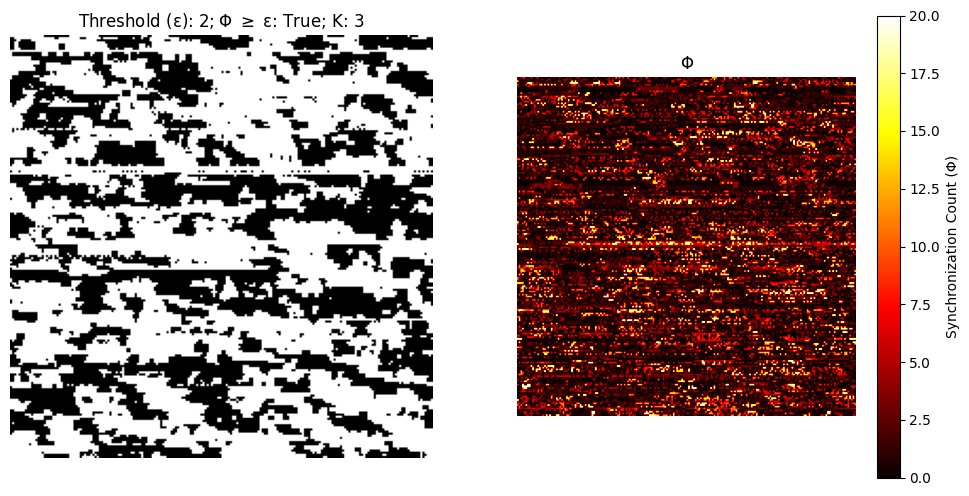

In [35]:
gates = [AND, OR, XOR]

N = 200
K = 3 #num of inputs to each neuron
S = np.random.choice((0,1), size = (N, N))
N_iter = 20 #number of iterations
ϵ = 2
Φ = np.zeros((N, N), dtype=int) #To keep track of synchronization at each neuron/ensemble

idxs = [np.random.choice(N, (K, 2)) for _ in range(N)] #Interactions
gate = np.random.choice(gates, (N, N)) # Choice gate for each node

"""
compare condition between Φ and ε
If True -> Ensemble when Φ >= ε
If False -> Ensemble when Φ == ε
"""
geq_cond = True 

#Init plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
mat1 = ax1.imshow(S, cmap="gray", vmin=0, vmax=1)
mat2 = ax2.imshow(Φ, cmap="hot", vmin=0, vmax=N_iter)
ax1.set_title(f"Threshold (ε): {ε}")
ax1.axis("off")
ax2.set_title("Φ")
ax2.axis("off")
cbar2 = fig.colorbar(mat2, ax=ax2)
cbar2.set_label("Synchronization Count (Φ)")

def update(frame, *args):
    global S, Φ, ε, gate
    print(f"Iteration {frame + 1}/{N_iter}")
    """
    if np.mean(Φ) >= ε:
        gate = np.random.choice(gates, (N, N))
    """
    new_state = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            inputs = np.array([S[row, col] for row, col in idxs[i]])  
            new_state[i, j] = gate[i, j](inputs)
    
    sync = (new_state == S)
    Φ[sync] += 1 
    Φ[~sync] = 0
    if geq_cond:
        mask_ensemble = (Φ >= ε)
    else:
        mask_ensemble = (Φ == ε)
    S = new_state
    if np.any(mask_ensemble):
        ensemble_idxs = np.argwhere(mask_ensemble)
        for i, j in ensemble_idxs:
            S[(i-1) % N, (j-1) % N] = S[i, j]  #upper left 
            S[(i-1) % N, (j+1) % N] = S[i, j]  #upper right 
            S[(i+1) % N, (j+1) % N] = S[i, j]  #bottom right 
            S[(i+1) % N, (j-1) % N] = S[i, j]  #bottom left
            S[i, (j-1) % N] = S[i, j]  #left 
            S[i, (j+1) % N] = S[i, j]  #right 
            S[(i-1) % N, j] = S[i, j]  #up 
            S[(i+1) % N, j] = S[i, j]  #down 
    mat1.set_array(S)
    mat2.set_array(Φ)

    ax1.set_title(f"Threshold (ε): {ε}; Φ $\geq$ ε: {geq_cond}; K: {K}")
    return mat1, mat2

ani = FuncAnimation(fig, update, frames=N_iter, interval=1000)
ani.save("autopoietic_net.gif", writer="pillow", fps=10)
print("Finished!")